In [1]:
!pip install face_recognition
import face_recognition
from PIL import Image, ImageDraw
import numpy as np
from IPython.display import Image as SHOW

In [2]:
# Load a sample picture and learn how to recognize it.
image1 = face_recognition.load_image_file("/content/profil_2.jpg")
image1_face_encoding = face_recognition.face_encodings(image1)[0]

# Load a second sample picture and learn how to recognize it.
image2 = face_recognition.load_image_file("/content/zelenski.jpg")
image2_face_encoding = face_recognition.face_encodings(image2)[0]

In [3]:
# Create arrays of known face encodings and their names
known_face_encodings = [
    image1_face_encoding,
    image2_face_encoding ]
known_face_names = [
    "Senan",
    "Zelenski" ]

In [4]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("/content/bz.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)


pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

In [5]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown Person"

    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(48, 63, 159))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name,)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(48, 63, 159), outline=(48, 63, 159))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 0))

In [6]:
pil_image.show()
pil_image.save("/content/output.jpg")

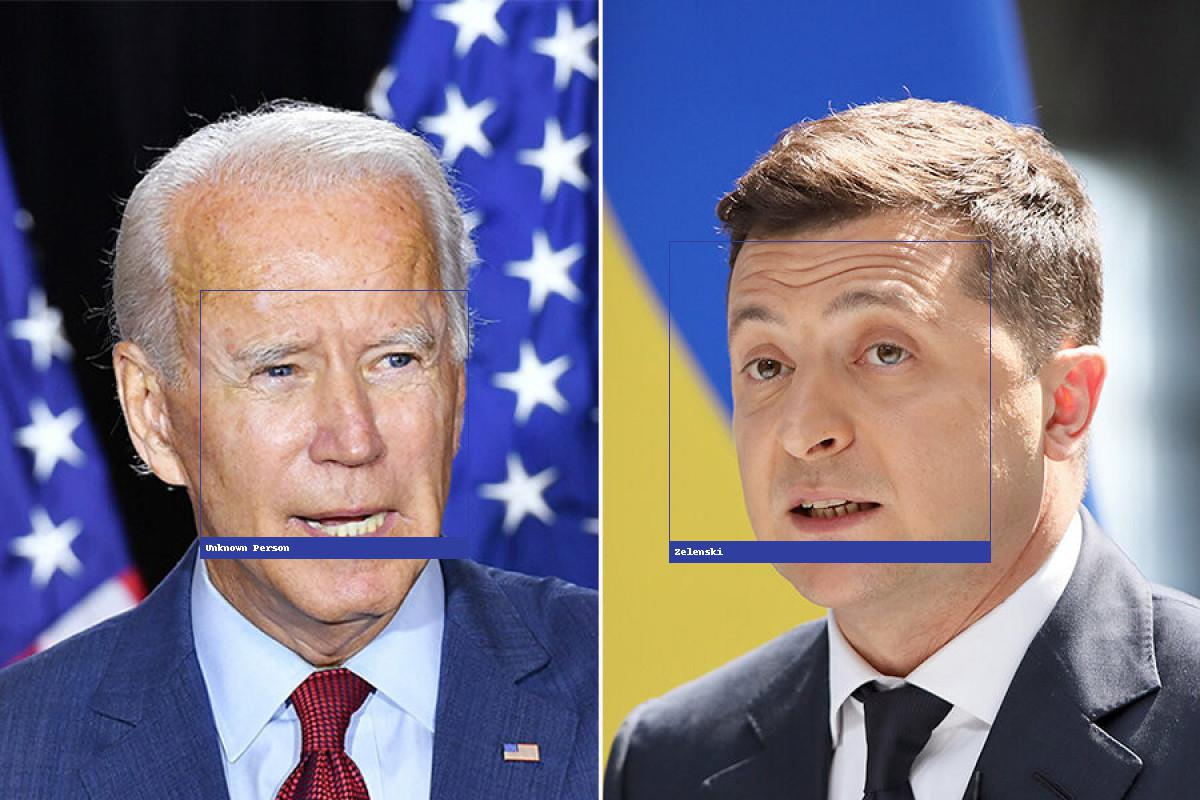

In [7]:
SHOW('/content/output.jpg')

In [8]:
#--------------------------